# Classify fish species using transfer learning
## \# Class activation heatmap for image classification
## \# Grad-CAM class activation visualization

Having around 9.000 pictures of 9 different seafood types, the goal is to create a model to classify them.

<img src="https://i.imgur.com/L9aeCGo.png" style="width: 70%; height: 70%" align = "left">

# Table of contents

[<h3>1. Load and transform the dataset</h3>](#1)

[<h3>2. Display 15 pictures of the dataset</h3>](#2)

[<h3>3. Load the Images with a generator</h3>](#3)

[<h3>4. Train the model</h3>](#4)

[<h3>5. Visualize the result</h3>](#5)

[<h3>6. Class activation heatmap for image classification</h3>](#5)

# General Description about the dataset and its paper

*** A Large-Scale Dataset for Segmentation and Classification ***

Authors: O. Ulucan, D. Karakaya, M. Turkan
Department of Electrical and Electronics Engineering, Izmir University of Economics, Izmir, Turkey
Corresponding author: M. Turkan


***General Introduction***

This dataset contains 9 different seafood types collected from a supermarket in Izmir, Turkey
for a university-industry collaboration project at Izmir University of Economics, and this work
was published in ASYU 2020.
Dataset includes, gilt head bream, red sea bream, sea bass, red mullet, horse mackerel, 
black sea sprat, striped red mullet, trout, shrimp image samples. 

If you use this dataset in your work, please consider to cite:

* O.Ulucan , D.Karakaya and M.Turkan.(2020) A large-scale dataset for fish segmentation and classification.
In Conf. Innovations Intell. Syst. Appli. (ASYU)


***Purpose of the work***

This dataset was collected in order to carry out segmentation, feature extraction and classification tasks
and compare the common segmentation, feature extraction and classification algortihms (Semantic Segmentation, Convolutional Neural Networks, Bag of Features).
All of the experiment results prove the usability of our dataset for purposes mentioned above.



***Data Gathering Equipment and Data Augmentation***

Images were collected via 2 different cameras, Kodak Easyshare Z650 and Samsung ST60. 
Therefore, the resolution of the images are 2832 x 2128, 1024 x 768, respectively.

Before the segmentation, feature extraction and classification process, the dataset was resized to 590 x 445
by preserving the aspect ratio. After resizing the images, all labels in the dataset were augmented (by flipping and rotating). 

At the end of the augmentation process, the number of total images for each class became 2000; 1000 for the RGB fish images
and 1000 for their pair-wise ground truth labels. 



***Description of the data in this data set***

The dataset contains 9 different seafood types. For each class, there are 1000 augmented images and their pair-waise augmented ground truths.
Each class can be found in the "Fish_Dataset" file with their ground truth labels. All images for each class are ordered from "00000.png" to "01000.png".
 
For example, if you want to access the ground truth images of the shrimp in the dataset, the order should be followed is "Fish->Shrimp->Shrimp GT".

# 0. Upload the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir Dataset
!cd Dataset
!unzip drive/MyDrive/Fish_Dataset.zip

# 1. Load and transform the dataset<a class="anchor" id="1"></a>

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import tensorflow as tf 

In [ ]:
image_dir = Path('Dataset/')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

image_df

,Filepath,Label
0,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
1,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
2,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
3,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
4,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
...,...,...
11531,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus
11532,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus
11533,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus
11534,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus


In [ ]:
# Drop GT images
image_df = image_df[image_df['Label'].apply(lambda x: x[-2:] != 'GT')]
image_df

,Filepath,Label
0,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
1,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
2,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
3,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
4,Dataset/Fish_Dataset/Nastoyashh_gurami/Nastoya...,Nastoyashh_gurami
...,...,...
11531,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus
11532,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus
11533,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus
11534,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus


In [ ]:
# Activate this code to use only 100 pictures for each label
# lst = []
# for l in image_df['Label'].unique():
#     lst.append(image_df[image_df['Label'] == l] .sample(100, random_state = 0))
# # Concatenate the DataFrames
# image_df = pd.concat(lst)


In [ ]:
# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

,Filepath,Label
0,Dataset/Fish_Dataset/Arovana/Arovana/Arovana32...,Arovana
1,Dataset/Fish_Dataset/Leshhevidnyj_barbus/Leshh...,Leshhevidnyj_barbus
2,Dataset/Fish_Dataset/Arovana/Arovana/Arovana32...,Arovana


# 2. Display 15 pictures of the dataset<a class="anchor" id="2"></a>

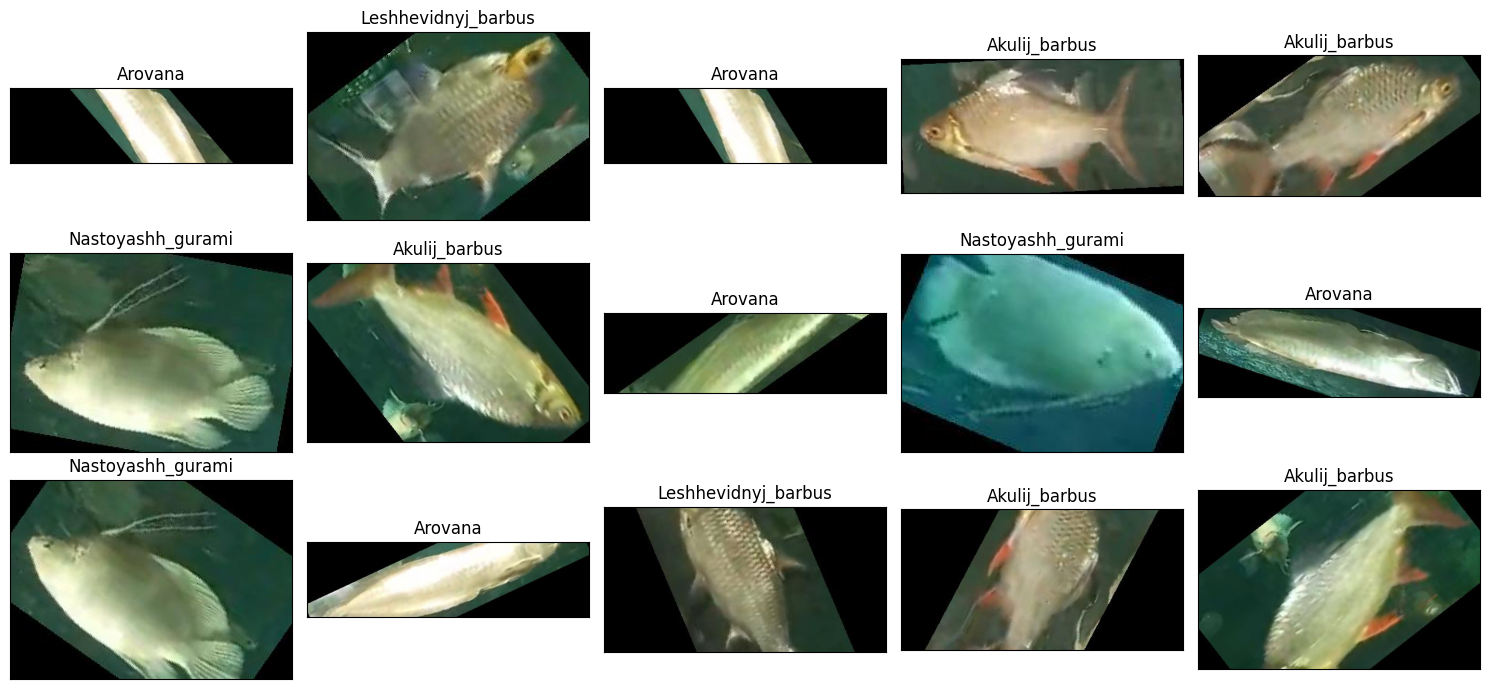

In [ ]:
# Display 15 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

# 3. Load the Images with a generator<a class="anchor" id="3"></a>

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.9, shuffle=True, random_state=1)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 8306 validated image filenames belonging to 4 classes.
Found 2076 validated image filenames belonging to 4 classes.
Found 1154 validated image filenames belonging to 4 classes.


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


# 4. Train the model<a class="anchor" id="4"></a>

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
260/260 [==============================] - 416s 2s/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 2.9235e-04 - val_accuracy: 1.0000
Epoch 2/50
 62/260 [======>.......................] - ETA: 4:02 - loss: 2.1692e-04 - accuracy: 1.0000

KeyboardInterrupt: ignored

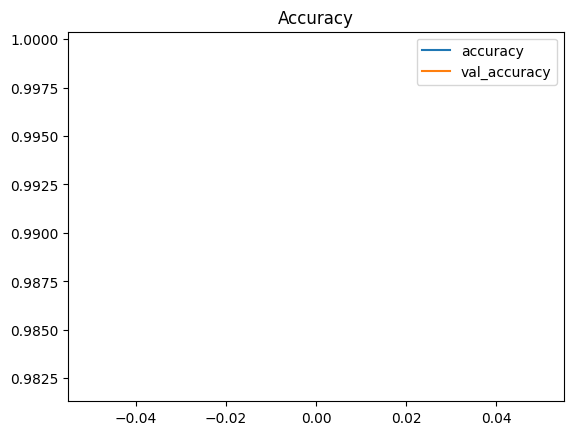

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

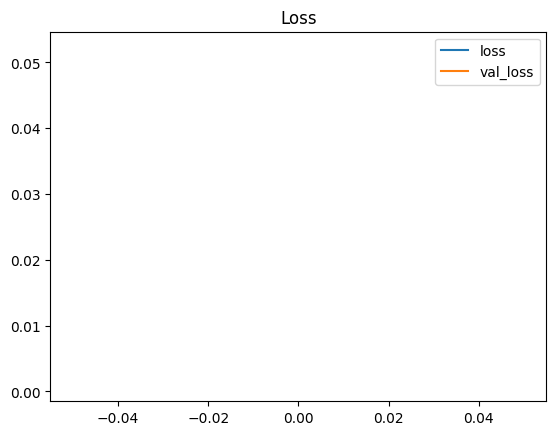

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# 5. Visualize the result<a class="anchor" id="5"></a>

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.00072
Test Accuracy: 100.00%


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

37/37 [==============================] - 238s 6s/step
The first 5 predictions: ['Leshhevidnyj_barbus', 'Nastoyashh_gurami', 'Akulij_barbus', 'Arovana', 'Leshhevidnyj_barbus']


In [ ]:
labels

{0: 'Akulij_barbus',
 1: 'Arovana',
 2: 'Leshhevidnyj_barbus',
 3: 'Nastoyashh_gurami'}

In [ ]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

      Akulij_barbus       1.00      1.00      1.00       273
            Arovana       1.00      1.00      1.00       315
Leshhevidnyj_barbus       1.00      1.00      1.00       266
  Nastoyashh_gurami       1.00      1.00      1.00       300

           accuracy                           1.00      1154
          macro avg       1.00      1.00      1.00      1154
       weighted avg       1.00      1.00      1.00      1154



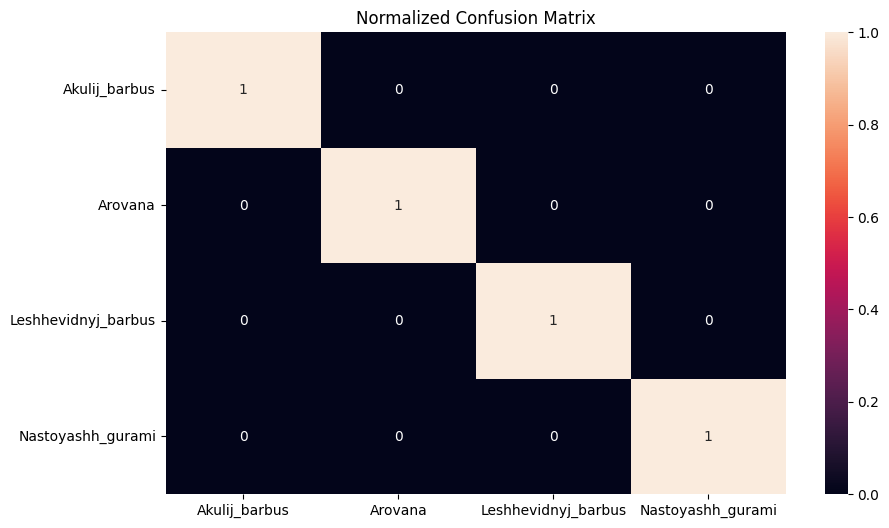

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

## Examples of prediction

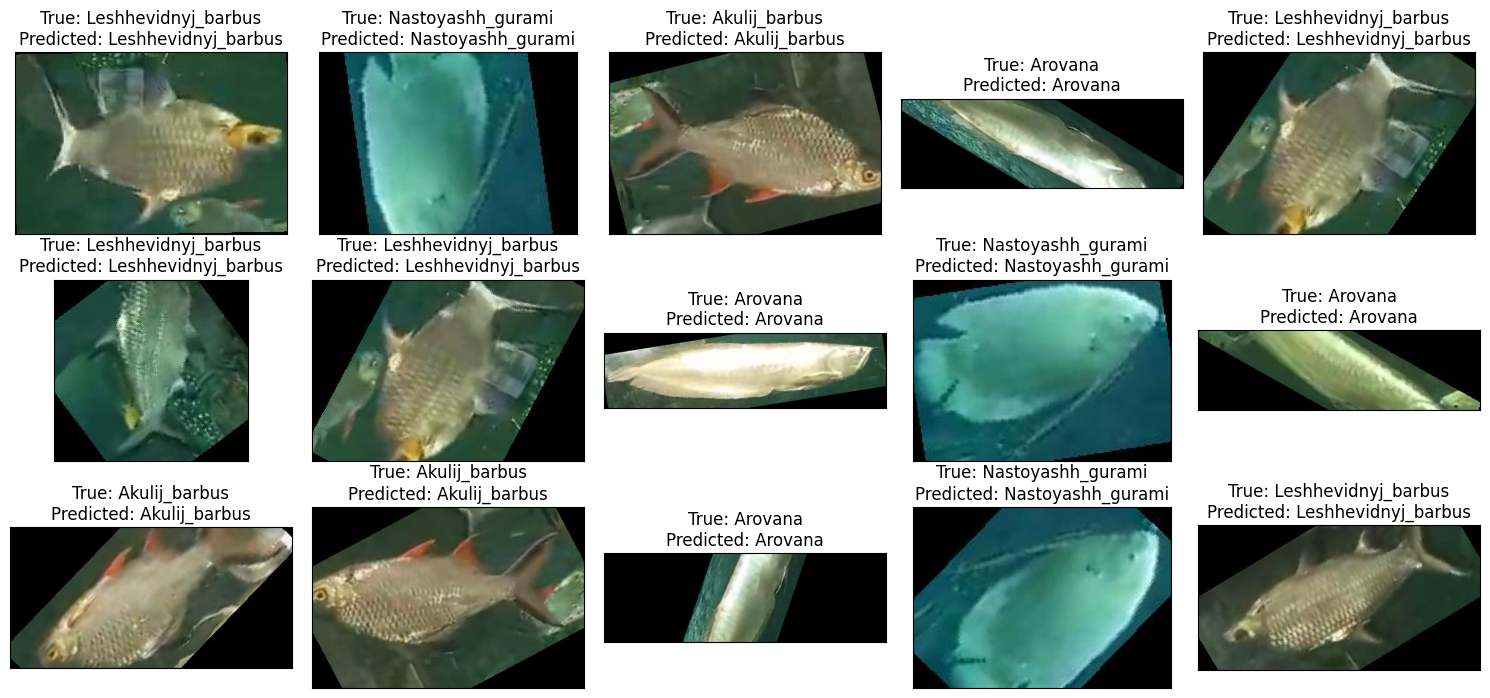

In [ ]:
# Display 15 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# 6. Save model weights

In [ ]:
model.save('neural_model')